# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
import math

In [6]:
df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the **distribution** of body temperatures **normal**?
* Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**descriptive stats**:

In [8]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Visualization of the data on a bar plot (orange) with a 
superimposed line plot representing the simulated normal curve (red).

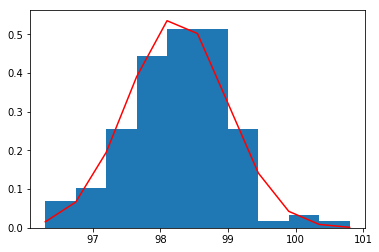

In [9]:
n, bins, patches = plt.hist(df.temperature, 10, normed=1)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')
plt.show()

**normaltest** returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen.

In [10]:
x=df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

As the **p-value** is **0.25** we can **not reject** the null hypothesis (the distribution is normal). Then we conclude that 
the body temperature **is normal** distributed.

## 2. Is the sample size large? Are the observations independent? 
Let's check the conditions for using the CLT on this sample:
* *Independece*: The sample observations are independents
 * They have been **randombly** selected
 * Sampling **without replacement** n<10%
* *Sample size/skew*:
 * n>30 

CLT conditions checked. 

## 3. Is the true population mean really 98.6 degrees F?###
* Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

In here our null hypothesis is that mean is equal to 98.6 while the alternative says the contrary:
* H<sub>0</sub>: population mean = 98.6 
* H<sub>L</sub>: population mean < 96.8


Let's check the conditions for using the CLT on this sample:
* *Independece*: The sample observations are independents
 * They have been **randombly** selected
 * Sampling **without replacement** n<10%
* *Sample size/skew*:
 * n>30 

CLT conditions checked. 

CLT data: 
$$\mu =  98.6$$ $$x=98.249231$$ $$SE=\frac{s}{\sqrt{n}}=\frac{0.733183}{\sqrt{130}}=0.064 $$


In [11]:
s=0.733183
nsqrt = math.sqrt(130)
SE= s/nsqrt
SE

0.06430440297695857

Due to we know the population mean, we can use the Z-test.
Let's calculate it:
$$Z = \frac{x - \mu}{SE}= \frac{x - \mu}{\frac{s}{\sqrt{n}}} = -5.455 $$

The values of the critical Z-score falls outside of the range for a CL = 95% (-1'96,1.96), 
then the pattern exhibited is probably too unusual to be just another version of random chance. If this is the case, it is possible to reject the null hypothesis and proceed to calculate the CI and the p-value.

In [12]:
mu= 98.6
x=98.249231
Z=round(float((x-mu)/SE),3)
print(Z)

p_values = stats.norm.sf(abs(Z))
p_values

-5.455


2.448642273974077e-08

With the z-score we can construct the CI:
$$x \pm (Z · SE) = (98.25 - (-0.35)),(98,25 + (-0.35)) = ( 97.90, 98.60 )    $$

We should remark the fact that 98.6 coincides with the upper boundary condition for the CI. 

In [13]:
StandardError = (abs(Z)*(SE))
StandardError

0.350780518239309

In [14]:
min_CI = x - StandardError
max_CI = x + StandardError
min_CI,max_CI

(97.89845048176069, 98.6000115182393)

Let's calculate the p-value using R:

* P(Z>-5.455) =  2.448642e-08 

[r code: pnorm(-5.455)]

This value is very low, we can reject  H<sub>0</sub> 

#### How will the result be different? 
(http://homepage.stat.uiowa.edu/~mbognar/applets/normal.html)
* P(X>98.6)=0
* P(X<98.6)=1
* Then the result will be lower than 98.6

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

At temperatures below 97.90 and above 98.60 (with a 95% of CL)

## 6.Is there a significant difference between males and females in normal temperature?
* Set up and solve for a two sample hypothesis testing.

Lets built two data frames from the original one. One for Males **(M)** and other for Females **(F)**.

In [15]:
F=df[df.gender=='F']
M=df[df.gender=='M']

Let's check if the two sample have the same size (n):

In [16]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

We need descriptive stats, then we use .describe() function:

In [17]:
M.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [18]:
F.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

#### Hypothesis testing:
* H<sub>0</sub>: mu<sub>M</sub> - mu<sub>F</sub> = 0 
* H<sub>L</sub>: mu<sub>M</sub> - mu<sub>F</sub> > or < 0 



Check the conditions:

    1) Independence

    2) Sample size

The samples meet the conditions, then proceed:

Confident Intervals:

(x<sub>M</sub>-x<sub>F</sub>) +- (Z· SE<sub>x<sub>M</sub>-x<sub>F</sub></sub>) 

SE<sub>x<sub>M</sub>-x<sub>F</sub></sub> = 0.13

(x<sub>M</sub>-x<sub>F</sub>) = x<sub>diff</sub> = -0.29

$$Z = \frac{x - \mu}{SE}= -2.23 $$

where x = x<sub>diff</sub>

So, the CI are:
$$ CI = (0.0, -0.58)$$

We see again as the null hypothesis mu_M-mu_F=0 falls on the lower boundary condition. 
Let's calculate the p-value.



In [19]:
s_M=0.698756
s_F=0.743488
n=65 # n_M = n_F
x_M=98.104615
x_F=98.393846
SE_FM=(math.sqrt(((s_M**2)+(s_F**2))/n))
x_diff=(x_M-x_F)


In [20]:
Z= (((x_diff - 0)/SE_FM))
print(Z)
Standard_Error = abs(Z)*SE_FM
CI_min= x_diff - Standard_Error
CI_max= x_diff + Standard_Error
CI_min,CI_max

-2.285435593459835


(-0.5784620000000018, 0.0)

Calculate the p-value:
    
    * P(Xdiff< -0.29) = P(z<Z) = P(z<-2.285435593459835) = 0.011144
so the for the two tails, 

P-value= 0.011144*2 = 0.022288

We can reject the null hypothesis as the p-value is 2.23%, indicating that **there is a significant difference between males and females in normal temperature**.

In [22]:
p = stats.norm.sf(abs(Z))
p

0.011143649471877832